# LAB 7

In [15]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Hamna
[nltk_data]     Moiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
train = pd.read_csv('labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)

X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


print(clf.predict([[2., 2.]]))

print(clf.predict_proba([[2., 2.]]))


iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

[nltk_data] Downloading package stopwords to C:\Users\Hamna
[nltk_data]     Moiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[1]
[[0. 1.]]


In [7]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

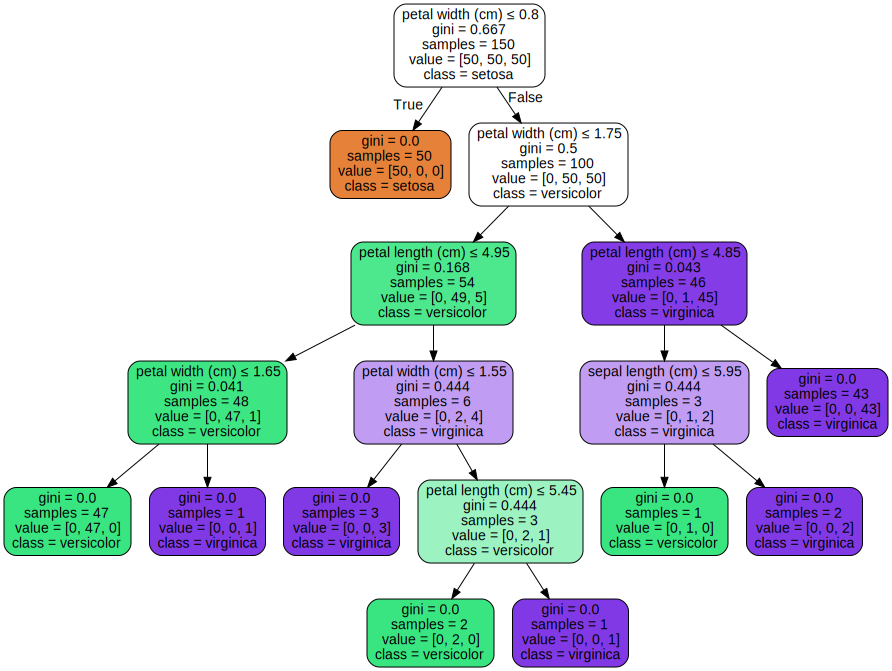

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [9]:
print(clf.predict(iris.data[:1, :]))

print(clf.predict_proba(iris.data[:1, :]))

[0]
[[1. 0. 0.]]


In [11]:
def review_to_words(raw_review):
    #1. Remove HTML
    review_bs_obj = BeautifulSoup(raw_review)
    review = review_bs_obj.get_text()
    #2. Remove non letters
    review = re.sub('[^A-Za-z]+',' ', review)
    #3. Convert to lowercase and split it into words
    review_words = review.lower().split()
    #4. Remove stops words
    stops = set(stopwords.words('english'))
    review_words = [w for w in review_words if not w in stops] 
    #5. Joint back and return the joined sentence
    review_sentence = " ".join(review_words)
    return review_sentence

for row in range(len(train)):
    train.at[row, 'review'] = review_to_words(train.at[row, 'review'])
    if(row%1000 == 0):
        print(row)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [41]:
import sklearn
vectorizer = sklearn.feature_extraction.text.CountVectorizer(analyzer='word',
                                                            tokenizer=None,
                                                            preprocessor=None,
                                                            stop_words=None,
                                                            max_features=3000)


train_size = 20000
X_train = train['review'][:train_size]
Y_train = train['sentiment'][:train_size]
X_test = train['review'][train_size:]
Y_test = train['sentiment'][train_size:]

training_X = vectorizer.fit_transform(X_train).toarray()
testing_X = vectorizer.fit_transform(X_test).toarray()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_X, Y_train)

predictions = clf.predict(testing_X)
compare = predictions == Y_test
print(compare.mean())

0.5278


In [22]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("imdb")

'imdb.pdf'

In [38]:

print(training_X[0])

0.525
[0 0 0 ... 0 0 0]
